<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/cuadernos/Modos_Normales_Membrana_Circular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membrana vibrante con fronteras fijas




Prof. Mario I. Caicedo

Hemos aprendido que la solución general del problema de oscilaciones transversales de cuerdas y mebranas rectangulares es una superposición de modos normales.

El propósito de este cuaderno consiste en visualizar las autofunciones del problema de oscilaciones transversales de una membrana circular.

La descripción de las vibraciones transversales de una membrana circular cuyo borde en $r=a$ se mantiene fijo y que comienza a moverse desde el reposo a patir de una cierta forma dada está dada por el problema de Cauchy 

$$
\frac{\partial^{2}u}{\partial{}r^{2}}+\frac{1}{r}\frac{\partial{}u}{\partial{}r}+\frac{1}{r^2}\frac{\partial^{2}u}{\partial\theta^{2}}-\frac{1}{v^2}\frac{\partial^{2}u}{\partial{}t^{2}}=0
$$

$$
u(r,\theta,a)=0
$$

$$
u(r,\theta,0)=f(r,\theta)\,,\qquad\frac{\partial{}u(r,\theta,0)}{\partial{}r}=0
$$

Al igual que sucede con la cuerda y la mebrana rectangular vibrantes, la solución general del problema de Cauchy está dada por una superposición de autofunciones. 

En este caso [$J_m(x)$ son las funciones de Bessel]  
$$
u(r,\theta,t)=\frac{1}{2}\sum_{k=1}^\infty\,a_{0,k}J_0(\kappa_{0,k}\,r)cos(\omega_{0,k}t)+\sum_{m,k}^\infty\,\left[a_{k,m}cos(m\theta)+b_{k,m}sen(m\theta)\right]J_m(\kappa_{m,k}\,r)cos(\omega_{m,k}t)
$$
Donde los autovalores se determinan a partir de los ceros de las funciones de Bessel, es decir, como las soluciones de
$$
J_m(\kappa_{m,k}\,a)=0
$$

**Referencia** H. F. Weinberger, A First Course on Partial Diffrential Equations. Capt. VII

Bibliotecas

In [ ]:
%matplotlib inline

import numpy as np
import scipy.special as sp

import matplotlib.pyplot as plt
from matplotlib import animation

import seaborn as sns


from IPython.display import HTML

-------------------------------------------

Fijando parámetros de cálculo.

In [ ]:
Pi = np.pi
vel=1.2
lx = 1
ly = 1

samples_x, samples_y = (50, 50)  

x = np.linspace(0, lx, samples_x)
y = np.linspace(0, ly, samples_y)

grid_x, grid_y = np.meshgrid(x,y)

In [ ]:
# Parámetros para las coordenadas polares
r_max = 1
theta_max = 2*Pi

# Número de muestras en cada variable
samples_r     = 100
samples_theta = 100

# Definición de los puntos en que se calcularaán las muestras
r = np.linspace(0, r_max, samples_r)
theta = np.linspace(0, theta_max, samples_theta)

grid_r, grid_theta = np.meshgrid(r, theta)

-----------------------------------------------

AUTOFUNCIONES

En este cuaderno nos limitaremos a las autofuncions pares en el ángulo polar $\theta$, es decir, autofuciones de la forma

$$
u_{m,n}(r,\theta,t)=cos(n\theta)\,J_n(\kappa_{n,m}\,r)\,cos(\omega_{n,m}t)\,,
$$
donde debemos recordar que el lo autovalores del laplaciano son las soluciones de
$$
J_n(\kappa_{n,m}\,a)=0\,,
$$
y las fecuencias propias de los modos están dadas por
$$
\omega_{n,m}=v\,\kappa_{n,m}
$$

Definiendo la autofunción

In [ ]:
def z_polar(r_grid, theta_grid, t, max_n, max_m):
  z_polar = np.zeros((samples_theta, samples_r)) # Arreglo en que se almacena la  autofunción
    
  for _n in range(max_n):
    jnz = sp.jn_zeros(_n, max_m) # Cálculo de los ceros de la función de Bessel

    for _m in range(max_m):
      n, m = _n, _m+1  # Acá estamos eacomodando el conteo porque el for comienza en 0

      A = np.cos(n*theta_grid) # Parte angular de la autofunción

      B = sp.jv(n, r_grid * jnz[_m] / r_max) # Parte radial

      C = np.cos(vel * jnz[_m] * t / r_max) # Dependencia temporal

      z_polar = 0.5*A * B * C
  return z_polar

------------------------------------------------

Preparación del Espacio de Graficación

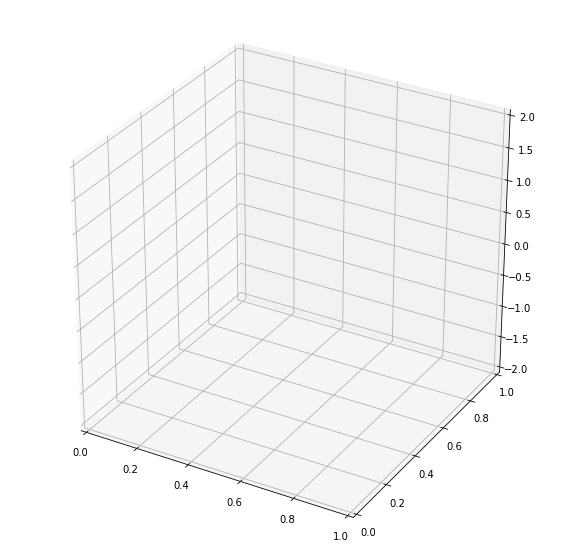

In [ ]:
# Cambio a coordenadas cartesianas

X, Y = grid_r * np.cos(grid_theta), grid_r * np.sin(grid_theta)

# Preparación de la figura
fig_polar = plt.figure(figsize=(10,10))

ax_polar = fig_polar.add_subplot(projection='3d')

ax_polar.set_zlim(-2., 2.)

# arranging z-values for each animation frame
max_time  = 2*Pi        # max simulation time
frames    = 200        # number of frames to get to max_time

z_polar_values  = np.linspace(0, max_time, frames)
z_polar_value_data = np.zeros((frames, samples_theta, samples_r)) # reserving memory for frame z-data

Cálculo de la autofunción para los puntos de la malla espacio temporal

In [ ]:
N=4 #Indice angular
M=2 # Indice radial (se escogen M raices de la función de Bessel)

In [ ]:
for i in range(frames):
  z_polar_value_data[i] = z_polar(grid_r, grid_theta, z_polar_values[i], N, M) # computing z-data per frame

# setting up initial polar plot
polar_plot = [ax_polar.plot_surface(X, Y, z_polar_value_data[0], antialiased=True, cmap=plt.cm.inferno, linewidth=0, vmax=0.2, vmin=-0.2)]

# setting up animation draw callback
def update_3d_polar_plot(frame, values, polar_plot):
  polar_plot[0].remove()
  polar_plot[0] = ax_polar.plot_surface(X, Y, values[frame], antialiased=True, cmap=plt.cm.inferno, linewidth=0, vmax=0.2, vmin=-0.2)
  return polar_plot[0],

ANIMACIÓN

In [ ]:
# computing polar plot animation
anim_polar = animation.FuncAnimation(fig_polar, update_3d_polar_plot, fargs=(z_polar_value_data, polar_plot), frames=frames, interval=50, blit=False)
HTML(anim_polar.to_html5_video())